#### We would be building a recommendation system where we can recommend books to users based on the types of books they prefer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
books = pd.read_csv('Books Data/books.csv')
ratings = pd.read_csv('Books Data/ratings.csv')
users = pd.read_csv('Books Data/users.csv')

C:\Users\adars\AppData\Local\Temp\ipykernel_3264\3534891354.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books Data/books.csv')


In [3]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [4]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [7]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [8]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Let's merge books and ratins so that we can explore our data a lot better

In [9]:
book_ratings = ratings.merge(books, on="ISBN")

In [10]:
book_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [11]:
book_ratings.shape

(1031136, 10)

In [12]:
book_ratings.dtypes

User-ID                 int64
ISBN                   object
Book-Rating             int64
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

Let's figure out the count of occurence of each rating (0-10)

In [13]:
book_ratings["Book-Rating"].value_counts()

0     647294
8      91804
10     71225
7      66402
9      60778
5      45355
6      31687
4       7617
3       5118
2       2375
1       1481
Name: Book-Rating, dtype: int64

<Axes: ylabel='Frequency'>

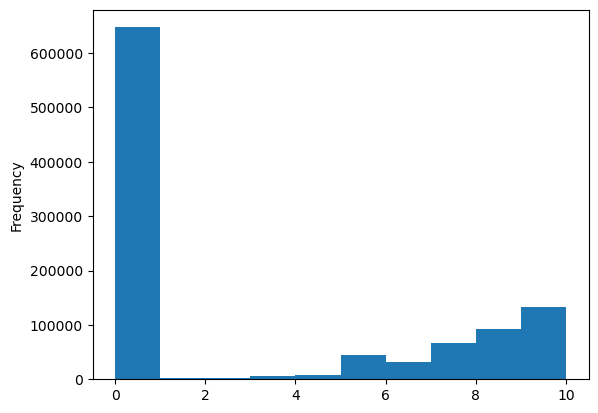

In [14]:
book_ratings["Book-Rating"].plot(kind="hist")

#### The most frequent rating is 0

This might mean two things:
1. Books with rating 0 are not rated
2. Books with rating 0 are indeed rated with 0

### Who are the most popular authors in the dataset?

In [15]:
author_ratings = book_ratings.groupby("Book-Author").agg({'Book-Rating': 'sum'}).reset_index().rename(columns={'Book-Rating': 'Total Rating'})

In [16]:
top_10_most_rated_authors = author_ratings.sort_values(by=["Total Rating"], ascending=False).head(10)

<Axes: xlabel='Book-Author'>

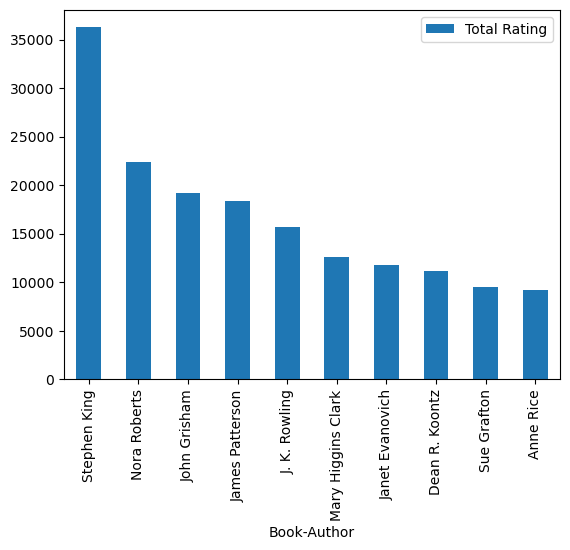

In [17]:
top_10_most_rated_authors.plot(kind="bar", x="Book-Author")

## Popularity Based Model

We will create a recommender who whill recommed the most popular books from our dataset

To determine the poularity we will use the ratings recieved by each book

Let us keep a threshold of most popular 10 books to be displayed

The books with highest ratings will be recommended

To avoid poor selection (based on ratings), we would only consider books who have been rated by atleast fifty users

In [18]:
number_of_ratings = book_ratings.groupby("Book-Title")["Book-Rating"].count().reset_index()
number_of_ratings.rename(columns = {"Book-Rating":"number-of-ratings"}, inplace=True)

In [19]:
average_ratings = book_ratings.groupby("Book-Title")["Book-Rating"].mean().reset_index()
average_ratings.rename(columns = {"Book-Rating":"average_rating"}, inplace=True)

In [20]:
ratings = number_of_ratings.merge(average_ratings, on="Book-Title")
ratings

,Book-Title,number-of-ratings,average_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [21]:
ratings["number-of-ratings"] >= 250

0         False
1         False
2         False
3         False
4         False
          ...  
241066    False
241067    False
241068    False
241069    False
241070    False
Name: number-of-ratings, Length: 241071, dtype: bool

In [22]:
most_popular_books = ratings[ratings["number-of-ratings"] >= 250].sort_values(by="number-of-ratings", ascending=False).head(50)

In [23]:
most_popular_books

,Book-Title,number-of-ratings,average_rating
234951,Wild Animus,2502,1.019584
196326,The Lovely Bones: A Novel,1295,4.468726
183573,The Da Vinci Code,898,4.642539
5303,A Painted House,838,3.231504
199237,The Nanny Diaries: A Novel,828,3.530193
27922,Bridget Jones's Diary,815,3.527607
206502,The Secret Life of Bees,774,4.447028
52983,Divine Secrets of the Ya-Ya Sisterhood: A Novel,740,3.437838
204387,The Red Tent (Bestselling Backlist),723,4.334716
14392,Angels &amp; Demons,670,3.708955


In [24]:
most_popular_books.merge(books, on="Book-Title").head()

,Book-Title,number-of-ratings,average_rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Wild Animus,2502,1.019584,0971880107,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,The Lovely Bones: A Novel,1295,4.468726,0316666343,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,The Da Vinci Code,898,4.642539,0385504209,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,The Da Vinci Code,898,4.642539,0739307312,DAN BROWN,2003,Random House Audio,http://images.amazon.com/images/P/0739307312.0...,http://images.amazon.com/images/P/0739307312.0...,http://images.amazon.com/images/P/0739307312.0...
4,The Da Vinci Code,898,4.642539,0739302043,DAN BROWN,2003,Random House Audio,http://images.amazon.com/images/P/0739302043.0...,http://images.amazon.com/images/P/0739302043.0...,http://images.amazon.com/images/P/0739302043.0...


## Collaborative Filtering based Recommender

A collboration based recommender system takes into account the ratings each user has given to a particular book and based on that rating, the recommnder proposes a book to the user.

We would be selecting users that have rated atleast 200 books in our dataset

We would be considering only the books who have been rated by atleast 50 users

In [25]:
#grouping based on user and finding their number of votes
experienced_users = book_ratings.groupby("User-ID").count()["Book-Rating"] > 200
experienced_users = experienced_users[experienced_users].index

In [26]:
#fetching all the experienced users from our book_ratings dataframe
filtered_users = book_ratings[book_ratings["User-ID"].isin(experienced_users)]

In [27]:
filtered_users.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [28]:
#grouping based on user and finding their number of votes
pop_books = filtered_users.groupby("Book-Title").count()["Book-Rating"] > 50
pop_books = pop_books[pop_books].index

In [39]:
pop_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=679)

In [29]:
final_ratings = filtered_users[filtered_users["Book-Title"].isin(pop_books)]

In [30]:
final_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...


We will now create a dataframe that has Books as its index and each user as a column

This would give us a good idea about the ratings given by each user for a particular book

In [31]:
ratings_by_users = final_ratings.pivot_table(index="Book-Title", columns="User-ID", values="Book-Rating")
ratings_by_users.fillna(0, inplace=True)

In [32]:
ratings_by_users

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### How will the system work?

Since we have the rating by each user for a particular book, we can imagine each user rating for a book to be a vector in an n dimensional space

We will calculate the Eucledian Distance between the rating for a particular book by a particular user

Let's say if "Book A" is rated by me as 9/10 and "Book B" is rated by me as 8/10 then the Euclidean Distance between both these ratings is very less"

This would entail that a person who liked "Book A" might like "Book B" 

Now when a user highly rates "Book A", they will be recommended to read "Book B" as well since some of our users who liked "Book A" also liked "Book B"

In [33]:
from sklearn.metrics.pairwise import cosine_similarity

In [34]:
similarity_scores = cosine_similarity(ratings_by_users)

In [35]:
similarity_scores.shape

(679, 679)

In [36]:
def recommend(book_name):
    index_of_book = np.where(ratings_by_users.index == book_name)[0][0]
    similar_books = sorted(list(enumerate(similarity_scores[index_of_book])),key= lambda x:x[1], reverse=True)[1:6]
    
    for i in similar_books:
        print(ratings_by_users.index[i[0]])

In [37]:
recommend('Zen and the Art of Motorcycle Maintenance: An Inquiry into Values')

Prodigal Summer
Pet Sematary
Midnight
The Hitchhiker's Guide to the Galaxy
A Prayer for Owen Meany


In [38]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
